# Hebbian Neual network; Learning with no Backpropagation

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [148]:
# Learning

# the more turned on a neuron is the more it learns
# the idea is if i create athe weights as a function of the inputs then it should be the same as going backprop which looks at how much the wieght impact the loss
# which i think is a concequence of the weights being a function of the inputs

# create the (1+imput percentage matrix)



def create_mem(imput_1):
    memory_imput_1 = np.zeros(imput_1.shape)
    indexx = 0
    the_max_val = np.amax(imput_1)
    for i in imput_1:
        if (i[0]/the_max_val) < 0.70:
            memory_imput_1[indexx] = 1 - i[0]/the_max_val
        else:
            memory_imput_1[indexx] = 1 + i[0]/the_max_val
        indexx += 1
    return memory_imput_1

def linear(W,output_old):
    new_out = W @ output_old
    return new_out

def update_weights(W, mem):
    
    new = np.zeros_like(W)
    
    b = np.reshape(mem,(W.shape[1],))
    
    for i in range(W.shape[0]):
        new[i] = W[i]*b
    return new
        
        
        

In [149]:
# testing on itteration
# one: No convolution:



def one_iteration(x_train,W_1,W_2,W_3,total):
    for number in x_train:
        out,W_1,W_2,W_3 = forward_pass(number,W_1,W_2,W_3)
        total = np.c_[total,out]



        
        
    return total,W_1,W_2,W_3

#total,W_1,W_2 = one_iteration(x_train,W_1,W_2,total)
        

def test(W_1,W_2,W_3,img):
    out = np.zeros((10,1))
    for i in img:
        imput_1 = np.reshape(i/255,(784,1))

        out_1 = linear(W_1,imput_1)
        out_2 = linear(W_2,out_1)
        output = linear(W_3,out_2)
        out = np.c_[out,output]

    
    return out,W_1,W_2,W_3
    
    
        
        
        




In [150]:

def forward_pass(img, W_1,W_2,W_3):

    imput_1 = np.reshape(img/255,(784,1))
    
    mem_1 = create_mem(imput_1)

    out_1 = linear(W_1,imput_1)

    mem_2 = create_mem(out_1)

    out_2 = linear(W_2,out_1)
    
    mem_3 = create_mem(out_2)
    
    out = linear(W_3,out_2)
    
    
    
    W_1 = update_weights(W_1,mem_1)
    norm = np.linalg.norm(W_1)
    W_1 = W_1/norm
    
    W_2 = update_weights(W_2,mem_2)
    norm = np.linalg.norm(W_2)
    W_2 = W_2/norm
    
    W_3 = update_weights(W_3,mem_3)
    norm = np.linalg.norm(W_3)
    W_3 = W_3/norm

    
    return out,W_1,W_2,W_3


In [151]:
indices = np.where(y_train == 3)[0]
selected_x_train = x_train[indices]

In [152]:
W_1 = np.random.normal(0,1,size=(256,784))
norm = np.linalg.norm(W_1)
W_1 = W_1/norm

W_2 = np.random.normal(0,1,size=(32,256))
norm = np.linalg.norm(W_2)
W_2 = W_2/norm

W_3 = np.random.normal(0,1,size=(10,32))
norm = np.linalg.norm(W_3)
W_3 = W_3/norm

total = np.zeros((10,1))

In [153]:
total,W_1,W_2,W_3 = one_iteration(selected_x_train,W_1,W_2,W_3,total)

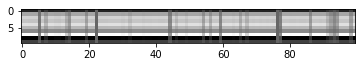

In [154]:
plt.imshow(total[:,-100:], cmap='gray')
plt.show()


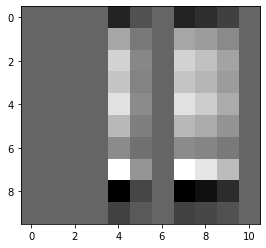

In [155]:
out,W_1,W_2,W_3 = test(W_1,W_2,W_3,x_train[0:10,:,:])
plt.imshow(out, cmap='gray')
plt.show()

In [156]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [163]:
np.round(out[:,8],decimals = 4)

array([-0.0021,  0.0021,  0.0035,  0.0031,  0.004 ,  0.0027,  0.0012,
        0.005 , -0.0033, -0.0012])

In [164]:
np.round(total[:,-1],decimals = 4)

array([-0.0026,  0.0025,  0.0043,  0.0037,  0.0048,  0.0032,  0.0015,
        0.006 , -0.004 , -0.0014])

In [165]:
np.round(out[:,7],decimals = 4)

array([-0.0026,  0.0025,  0.0042,  0.0037,  0.0048,  0.0032,  0.0014,
        0.006 , -0.0039, -0.0014])

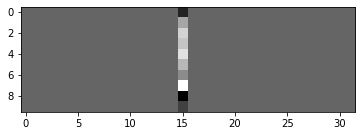

In [160]:
plt.imshow(W_3, cmap='gray')
plt.show()

In [161]:
W_3

array([[ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.22250044,  0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ,
        -0.        ,  0.        ,  0.        , -0.        , -0.        ,
         0.        , -0.        ],
       [-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        , -0.        ,  0.        , -0.        ,
         0.21867702,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        ,  0.        ,  0.        , -0.        ,
         0.        ,  0.        , -0.        ,  0.        , -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , -0.    